In [1]:
#import necessary library
import pandas as pd, numpy as np, re, unicodedata, hashlib, string
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from IPython.display import HTML
from ydata_profiling import ProfileReport
import base64

In [6]:
#Load dataset
Path = "https://raw.githubusercontent.com/the-buike/Housing_EDA/refs/heads/main/housing.csv"
housing = pd.read_csv(Path)

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
#Quick check
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#drop null values
housing.dropna(inplace=True)

In [9]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

x = housing.drop(['median_house_value'], axis=1)
y = housing['median_house_value']

In [26]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [27]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [57]:
train_data = x_train.join(y_train)

In [58]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7029,-118.10,33.96,38.0,1657.0,335.0,1195.0,309.0,4.1711,<1H OCEAN,160100.0
2811,-119.03,35.42,42.0,1705.0,418.0,905.0,393.0,1.6286,INLAND,54600.0
20103,-120.35,37.98,4.0,1658.0,301.0,676.0,278.0,3.5714,INLAND,149500.0
8266,-118.18,33.77,49.0,2297.0,759.0,1105.0,629.0,1.8388,NEAR OCEAN,175000.0
13345,-117.64,34.05,27.0,1407.0,362.0,1684.0,350.0,2.1944,INLAND,95700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

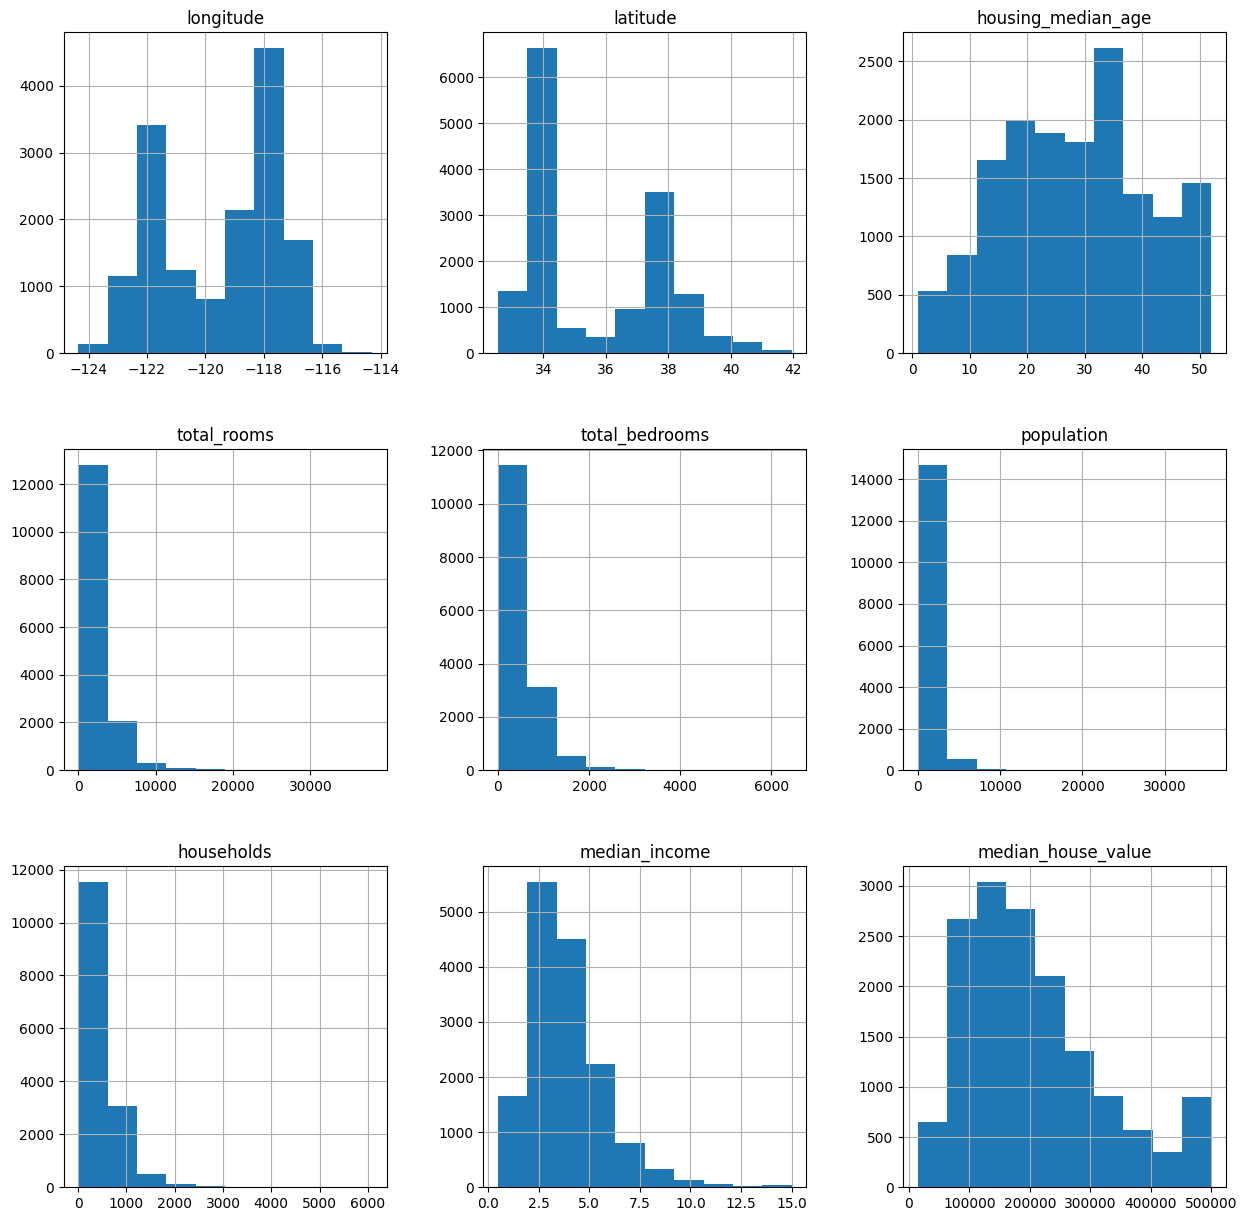

In [59]:
train_data.hist(figsize = (15,15))

<Axes: >

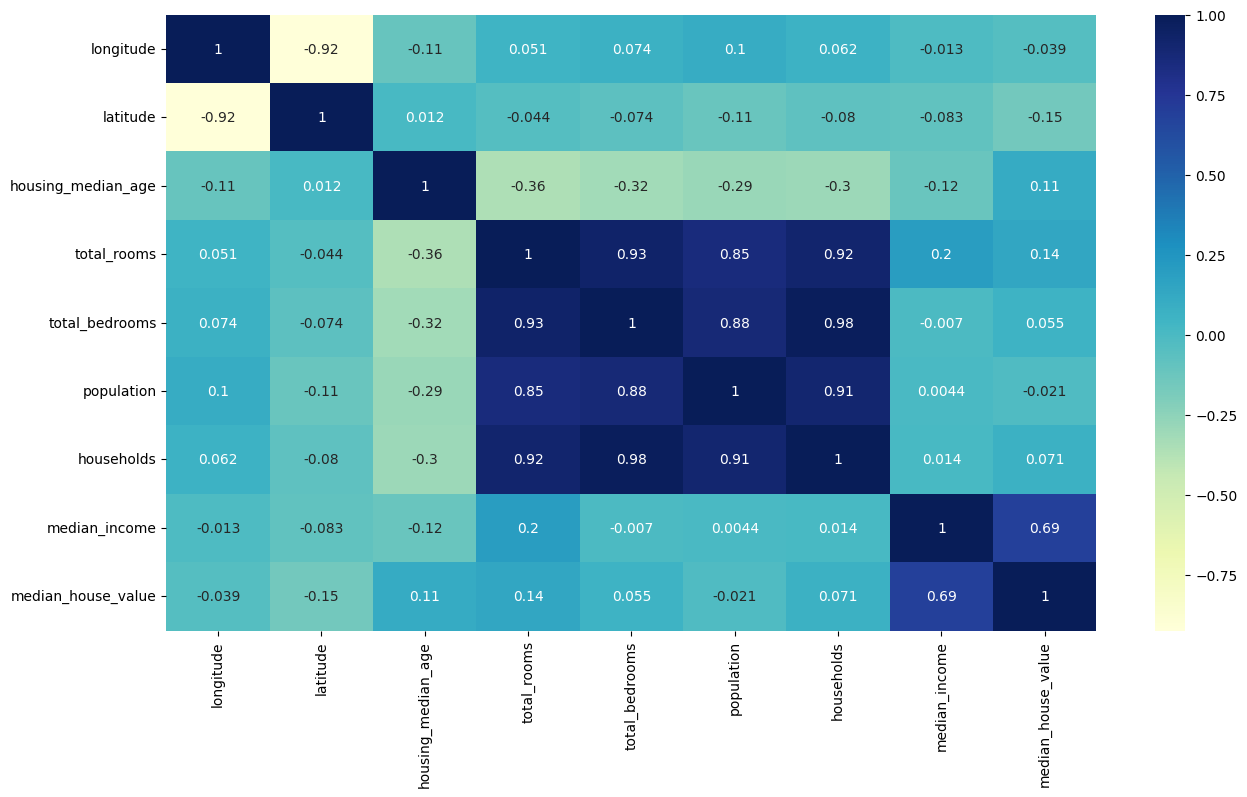

In [60]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [61]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

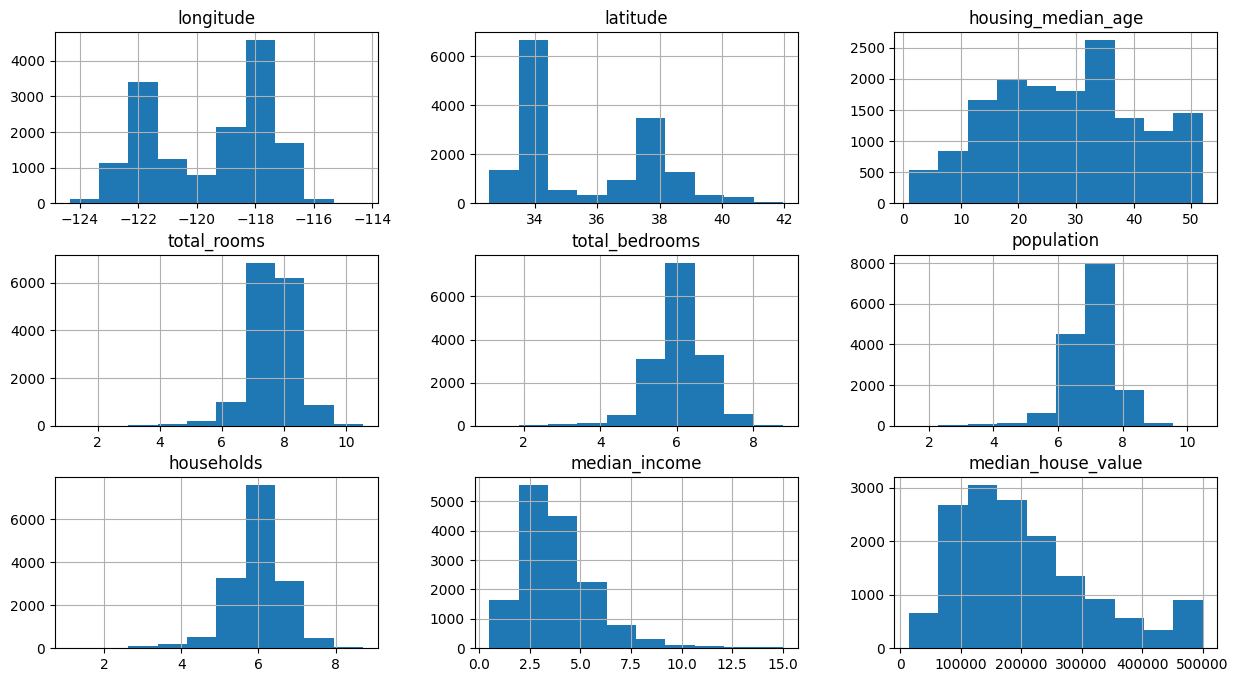

In [62]:
train_data.hist(figsize = (15,8))

In [63]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     6790
INLAND        4867
NEAR OCEAN    1973
NEAR BAY      1690
ISLAND           4
Name: count, dtype: int64

In [64]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [65]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7029,-118.10,33.96,38.0,7.413367,5.817111,7.086738,5.736572,4.1711,160100.0,True,False,False,False,False
2811,-119.03,35.42,42.0,7.441907,6.037871,6.809039,5.976351,1.6286,54600.0,False,True,False,False,False
20103,-120.35,37.98,4.0,7.413970,5.710427,6.517671,5.631212,3.5714,149500.0,False,True,False,False,False
8266,-118.18,33.77,49.0,7.739794,6.633318,7.008505,6.445720,1.8388,175000.0,False,False,False,False,True
13345,-117.64,34.05,27.0,7.249926,5.894403,7.429521,5.860786,2.1944,95700.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444,-120.39,34.52,40.0,7.679251,5.981414,6.918695,5.808142,2.5667,239300.0,False,False,False,False,True
7632,-118.29,33.84,33.0,6.799056,5.342334,6.738152,5.303305,3.5000,183000.0,True,False,False,False,False
12735,-121.34,38.59,23.0,7.976939,6.045005,7.032624,6.018593,5.9174,225900.0,False,True,False,False,False
158,-122.23,37.81,52.0,7.942718,5.902633,6.778785,5.866468,7.5080,348700.0,False,False,False,True,False


<Axes: >

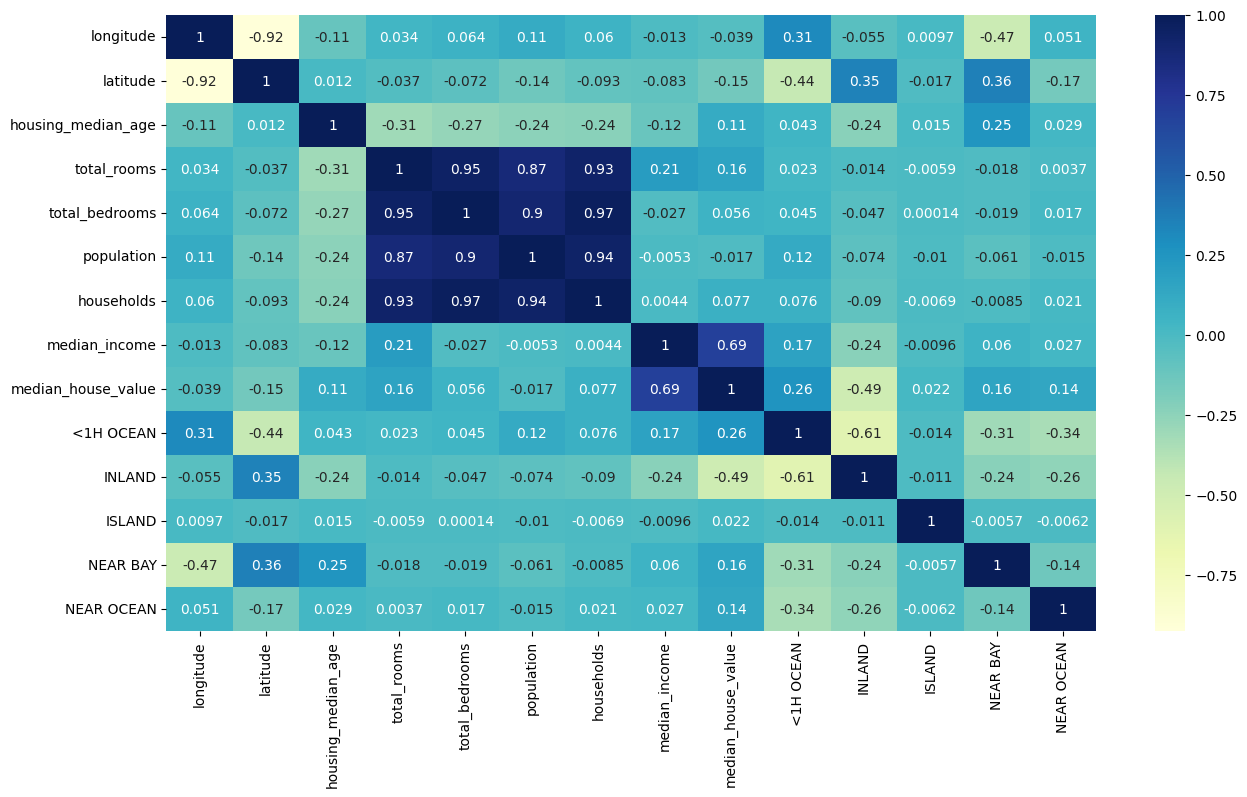

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

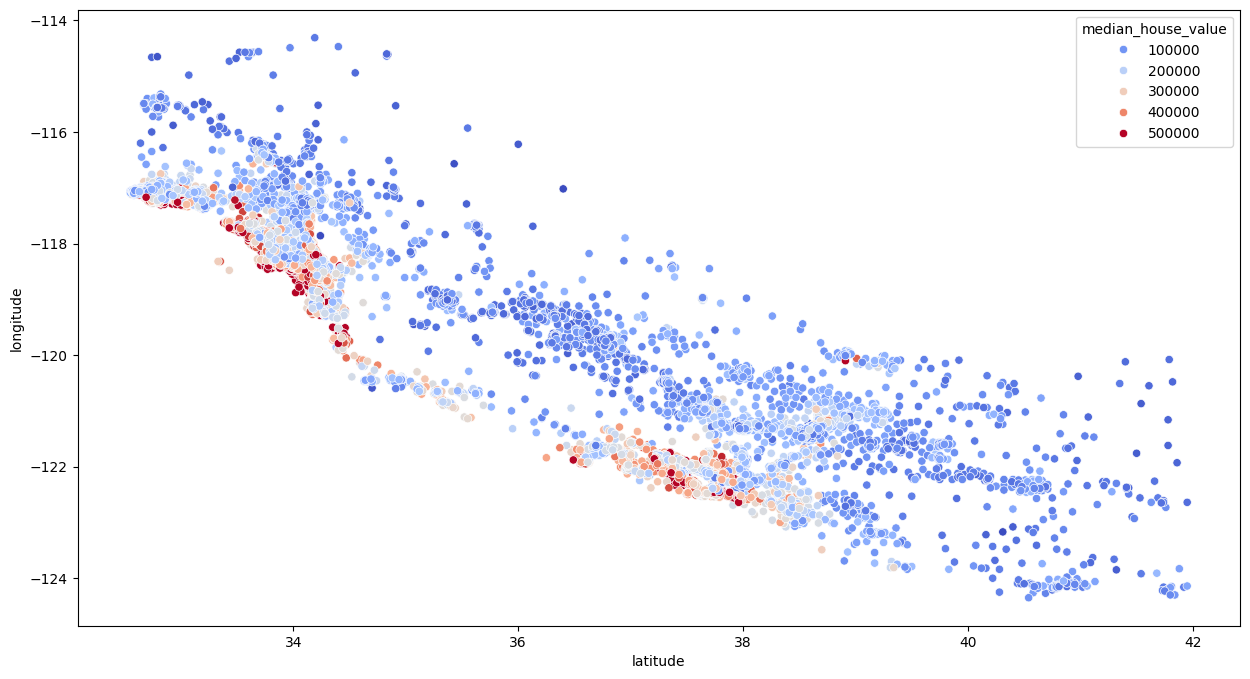

In [67]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [68]:
train_data['total_ratio'] =  train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] =  train_data['total_rooms'] / train_data['households']

<Axes: >

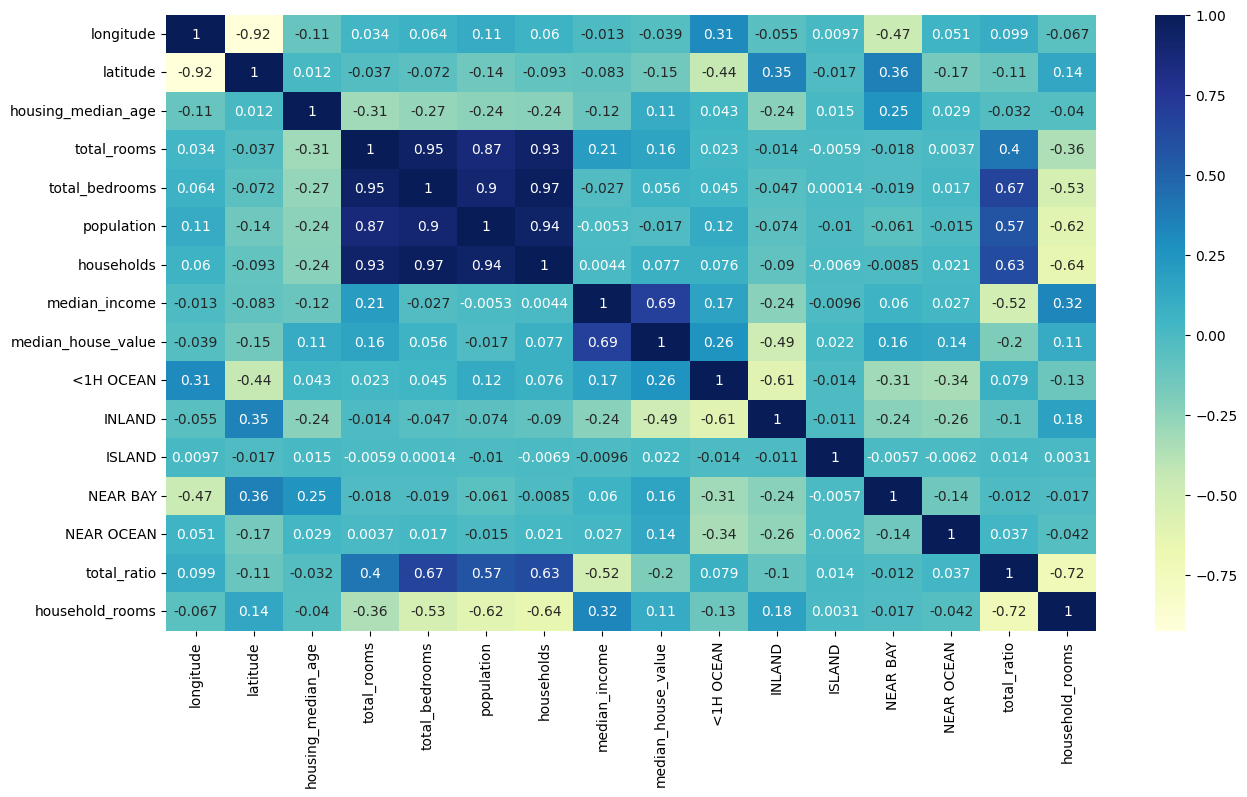

In [69]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [ ]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['total_ratio'] =  test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] =  test_data['total_rooms'] / test_data['households']



In [73]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [79]:
x_test_s = scaler.transform(x_test)

In [74]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,total_ratio,household_rooms
3757,-118.38,34.19,30.0,6.885510,5.579730,6.602588,5.556828,1.9866,177400.0,True,False,False,False,False,0.810358,1.239108
18908,-122.26,38.15,16.0,8.274357,6.590301,7.948385,6.523562,4.5053,123700.0,False,False,False,True,False,0.796473,1.268380
11896,-117.36,33.98,33.0,7.635787,6.152733,7.524021,6.148468,2.4667,80700.0,False,True,False,False,False,0.805776,1.241901
8285,-118.14,33.77,51.0,7.942007,6.432940,7.066467,6.340359,3.8750,342900.0,False,False,False,False,True,0.809989,1.252611
7998,-118.16,33.85,36.0,7.590852,5.828946,6.859615,5.828946,4.0815,216200.0,True,False,False,False,False,0.767891,1.302268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8228,-118.19,33.77,35.0,7.362011,6.403574,6.710523,6.244167,1.2321,137500.0,False,False,False,False,True,0.869813,1.179022
17110,-122.21,37.46,40.0,7.483244,5.337538,6.359574,5.337538,15.0001,500001.0,False,False,False,False,True,0.713265,1.402003
399,-122.29,37.89,52.0,7.727535,5.942799,6.912743,5.918894,5.1696,261400.0,False,False,False,True,False,0.769042,1.305571
16912,-122.34,37.56,39.0,8.178358,5.971262,7.038784,5.971262,12.6417,500001.0,False,False,False,False,True,0.730130,1.369620


In [80]:
reg.score(x_test_s, y_test)

0.6659064210212517

In [81]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [82]:
forest.score(x_test,y_test)

0.8138718093381159

In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [30, 50, 100],
    "max_features": [8, 12, 20],
    "min_samples_split": [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [84]:
best_forest = grid_search.best_estimator_

In [85]:
best_forest.score(x_test_s, y_test)

0.808644649655049